In [1]:
!pip install diffusers datasets transformers ftfy pyarrow==9.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 17.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
INFO: pip is looking at multiple ve

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
from diffusers import UNet2DModel

image_size=128
device = "cuda" if torch.cuda.is_available() else "cpu"
# create a model
model = UNet2DModel(
    sample_size= image_size, # The target image resolution
    in_channels=3, # The number of input channels, 3 for RGB images
    out_channels=3, # The number of output channels
    layers_per_block=2, # how many ResNet layers to use for each UNet block
    block_out_channels=(128, 128, 256, 256, 512, 512),  # The number of output channels for each UNet block
    down_block_types=(
        "DownBlock2D", # a regular ResNet downsampling block
        "DownBlock2D",
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
    ),
    up_block_types=(
        "UpBlock2D", # a regular ResNet upsampling block
        "AttnUpBlock2D", # a ResNet upsampling block with spatial self-attention
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
        "UpBlock2D"
    ),
)
model.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-05, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Con

In [22]:
model.load_state_dict(torch.load("/content/drive/MyDrive/butterfly_diffusion_model8.pt"))

#!head -n 350 /content/drive/MyDrive/butterfly_diffusion_model9.pt | tail -n 50

<All keys matched successfully>

In [7]:
import numpy as np
from diffusers import DDPMPipeline
from diffusers import DDPMScheduler
from diffusers import DDIMScheduler

  0%|          | 0/1000 [00:00<?, ?it/s]

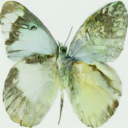

In [23]:
noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule="squaredcos_cap_v2")
image_pipe = DDPMPipeline(unet=model, scheduler=noise_scheduler)
pipeline_output = image_pipe(num_inference_steps=1000)
pipeline_output.images[0]

In [37]:
scheduler = image_pipe.scheduler
scheduler.set_timesteps(1000)

In [30]:
scheduler.timesteps

tensor([998, 996, 994, 992, 990, 988, 986, 984, 982, 980, 978, 976, 974, 972,
        970, 968, 966, 964, 962, 960, 958, 956, 954, 952, 950, 948, 946, 944,
        942, 940, 938, 936, 934, 932, 930, 928, 926, 924, 922, 920, 918, 916,
        914, 912, 910, 908, 906, 904, 902, 900, 898, 896, 894, 892, 890, 888,
        886, 884, 882, 880, 878, 876, 874, 872, 870, 868, 866, 864, 862, 860,
        858, 856, 854, 852, 850, 848, 846, 844, 842, 840, 838, 836, 834, 832,
        830, 828, 826, 824, 822, 820, 818, 816, 814, 812, 810, 808, 806, 804,
        802, 800, 798, 796, 794, 792, 790, 788, 786, 784, 782, 780, 778, 776,
        774, 772, 770, 768, 766, 764, 762, 760, 758, 756, 754, 752, 750, 748,
        746, 744, 742, 740, 738, 736, 734, 732, 730, 728, 726, 724, 722, 720,
        718, 716, 714, 712, 710, 708, 706, 704, 702, 700, 698, 696, 694, 692,
        690, 688, 686, 684, 682, 680, 678, 676, 674, 672, 670, 668, 666, 664,
        662, 660, 658, 656, 654, 652, 650, 648, 646, 644, 642, 6

In [34]:
# DDPM - this method requires a lot of timesteps to crete a good image i.e. ~= 1000
X_t = torch.randn(1, 3, 128, 128).to(device)
for i, t in enumerate(scheduler.timesteps):
  model_input = scheduler.scale_model_input(X_t, t)

  with torch.no_grad():
    pred_epsilon = image_pipe.unet(model_input, t)["sample"]

  alpha_t = scheduler.alphas[t]
  alpha_bar_t = scheduler.alphas_cumprod[t]

  if t != 0:
    alpha_bar_t_minus_delta_t = scheduler.alphas_cumprod[scheduler.timesteps[i + 1]]
  else:
    alpha_bar_t_minus_delta_t = 1

  beta_t =  scheduler.betas[t]
  target_beta = ((1 - alpha_bar_t_minus_delta_t) / (1 - alpha_bar_t)) * beta_t
  noise = torch.randn(1, 3, 128, 128).to(device)
  X_t_minus_delta_t = (1 / torch.sqrt(alpha_t)) * (X_t - (beta_t / torch.sqrt(1 - alpha_bar_t)) * pred_epsilon) + torch.sqrt(target_beta) * noise
  X_t = X_t_minus_delta_t

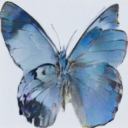

In [35]:
import PIL
X_zero = X_t[0].permute(1,2,0)
PIL.Image.fromarray(np.uint8(((X_zero.cpu().clip(-1,1) * 0.5 + 0.5)*255).long().numpy()))

In [44]:
scheduler = image_pipe.scheduler
scheduler.set_timesteps(250)
scheduler.timesteps

tensor([996, 992, 988, 984, 980, 976, 972, 968, 964, 960, 956, 952, 948, 944,
        940, 936, 932, 928, 924, 920, 916, 912, 908, 904, 900, 896, 892, 888,
        884, 880, 876, 872, 868, 864, 860, 856, 852, 848, 844, 840, 836, 832,
        828, 824, 820, 816, 812, 808, 804, 800, 796, 792, 788, 784, 780, 776,
        772, 768, 764, 760, 756, 752, 748, 744, 740, 736, 732, 728, 724, 720,
        716, 712, 708, 704, 700, 696, 692, 688, 684, 680, 676, 672, 668, 664,
        660, 656, 652, 648, 644, 640, 636, 632, 628, 624, 620, 616, 612, 608,
        604, 600, 596, 592, 588, 584, 580, 576, 572, 568, 564, 560, 556, 552,
        548, 544, 540, 536, 532, 528, 524, 520, 516, 512, 508, 504, 500, 496,
        492, 488, 484, 480, 476, 472, 468, 464, 460, 456, 452, 448, 444, 440,
        436, 432, 428, 424, 420, 416, 412, 408, 404, 400, 396, 392, 388, 384,
        380, 376, 372, 368, 364, 360, 356, 352, 348, 344, 340, 336, 332, 328,
        324, 320, 316, 312, 308, 304, 300, 296, 292, 288, 284, 2

In [45]:
# DDIM - requires less timesteps
X_t = torch.randn(1, 3, 128, 128).to(device)
for i, t in enumerate(scheduler.timesteps):
  model_input = scheduler.scale_model_input(X_t, t)

  with torch.no_grad():
    pred_epsilon = image_pipe.unet(model_input, t)["sample"]

  alpha_bar_t = scheduler.alphas_cumprod[t] # cumulative product
  if t != 0:
    alpha_bar_t_minus_delta_t = scheduler.alphas_cumprod[scheduler.timesteps[i + 1]] # i + 1 == t minus delta_t
  else:
    alpha_bar_t_minus_delta_t = torch.tensor(1.0)

  predicted_X_zero = (X_t -torch.sqrt(1 - alpha_bar_t) * pred_epsilon) / torch.sqrt(alpha_bar_t)
  predicted_X_zero = predicted_X_zero.clamp(-scheduler.config.clip_sample_range, scheduler.config.clip_sample_range)

  X_t_minus_delta_t = torch.sqrt(alpha_bar_t_minus_delta_t) * predicted_X_zero + torch.sqrt(1 - alpha_bar_t_minus_delta_t) * pred_epsilon
  X_t = X_t_minus_delta_t

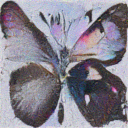

In [46]:
import PIL
X_zero = X_t[0].permute(1,2,0)
PIL.Image.fromarray(np.uint8(((X_zero.cpu().clip(-1, 1) * 0.5 + 0.5) * 255).long().numpy()))